In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

import zipfile
from google.colab import drive

# Helper libraries
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import cv2
import os

print(tf.__version__)

2.11.0


In [ ]:
print(image.imread('/content/drive/MyDrive/CSC420/Damaged/pic2'))

[[[11  6  0]
  [32 24 21]
  [24 14 12]
  ...
  [27 29 28]
  [28 30 29]
  [26 28 27]]

 [[ 6  1  0]
  [24 17 11]
  [23 13 11]
  ...
  [30 32 31]
  [30 32 31]
  [27 29 28]]

 [[28 21 13]
  [36 27 22]
  [40 29 25]
  ...
  [24 26 25]
  [21 23 22]
  [19 21 20]]

 ...

 [[53 43 34]
  [46 23 15]
  [43 10  3]
  ...
  [12 19 27]
  [ 8 15 23]
  [ 7 14 22]]

 [[59 60 55]
  [37 26 24]
  [66 42 40]
  ...
  [18 22 31]
  [12 16 25]
  [11 15 24]]

 [[14 24 25]
  [18 16 17]
  [24  8  8]
  ...
  [ 6 11 17]
  [ 0  5 11]
  [ 0  3  9]]]


Image height/size at 1024x1024 for a full directory caused crash


Attempted to use subset both parameter for image_dataset_from_directory method described in documentation however it didn't work.

https://www.tensorflow.org/tutorials/images/classification

In [ ]:
label = ["damaged", "not_damaged"]
batch_size = 32
# img_height = 1024
# img_width = 1024
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/CSC420/Training',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=batch_size,
  crop_to_aspect_ratio=False)
def get_data(data_dir):
  data = []
  # for label in labels:
  #   path 

Found 1516 files belonging to 2 classes.
Using 1213 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/CSC420/Test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256,256),
  batch_size=batch_size,
  crop_to_aspect_ratio=False)

Found 300 files belonging to 2 classes.
Using 60 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
#Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 2

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  #data_augmentation,
  tf.keras.layers.Conv2D(16, 3, activation='relu'), # 11/11 changed from 32 to 16
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(64, 3, activation='relu'), # 11/11 changed from 32 to 64
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
38/38 [==============================] - 76s 2s/step - loss: 1.0746 - accuracy: 0.7634 - val_loss: 0.3669 - val_accuracy: 0.8500
Epoch 2/20
38/38 [==============================] - 62s 2s/step - loss: 0.3077 - accuracy: 0.8681 - val_loss: 0.2900 - val_accuracy: 0.9333
Epoch 3/20
38/38 [==============================] - 62s 2s/step - loss: 0.2170 - accuracy: 0.9225 - val_loss: 0.4224 - val_accuracy: 0.7333
Epoch 4/20
38/38 [==============================] - 61s 2s/step - loss: 0.1113 - accuracy: 0.9621 - val_loss: 0.3698 - val_accuracy: 0.8333
Epoch 5/20
38/38 [==============================] - 63s 2s/step - loss: 0.1040 - accuracy: 0.9604 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 6/20
38/38 [==============================] - 62s 2s/step - loss: 0.1476 - accuracy: 0.9382 - val_loss: 0.1062 - val_accuracy: 0.9333
Epoch 7/20
38/38 [==============================] - 61s 2s/step - loss: 0.0424 - accuracy: 0.9901 - val_loss: 0.2301 - val_accuracy: 0.9167
Epoch 8/20
38/38 [==

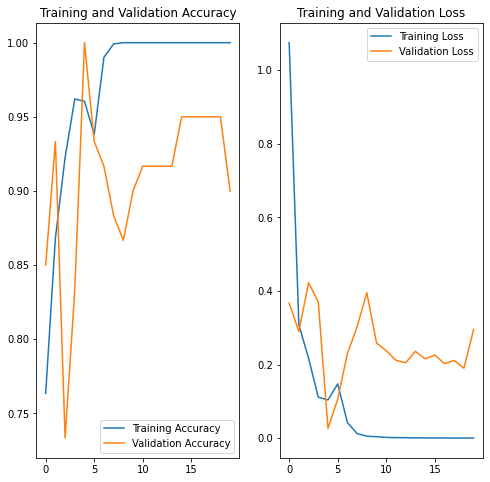

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Need to update the validation set, that is why it is high right now. 



In [ ]:
import os
import matplotlib.pyplot as mp
# directory = '/content/drive/MyDrive/CSC410/IMFD'

# for filename in os.scandir(directory):
#   if filename.is_dir():
#     print(filename.path)
#     print(filename.path[0:30]+'CMFD'+filename.path[34:len(filename.path)])


In [ ]:
model.save('/content/drive/MyDrive/CSC420/Prediction/saved_model')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/CSC420/Prediction/saved_model')

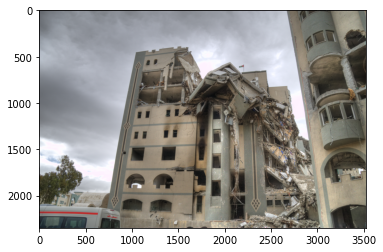

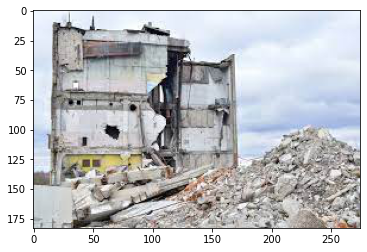

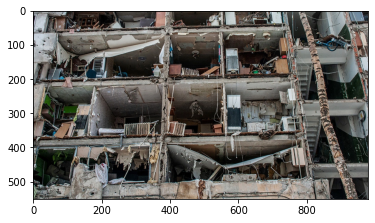

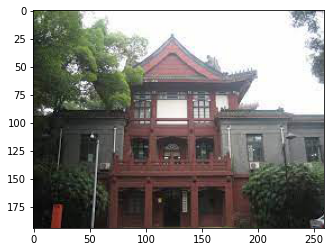

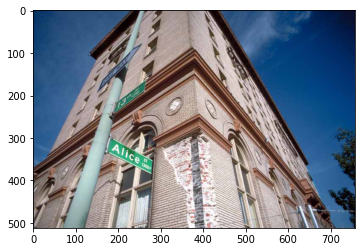

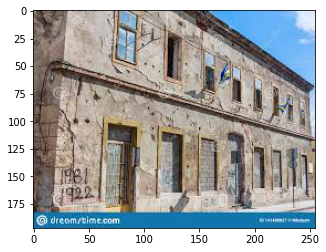

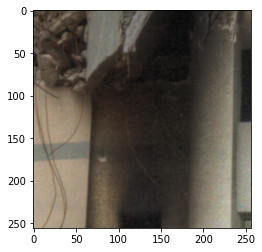

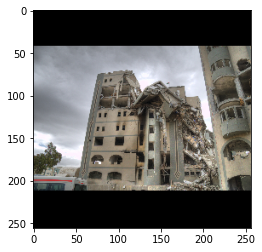

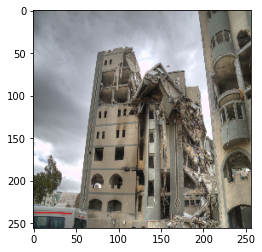

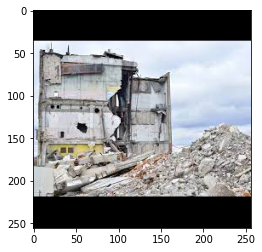

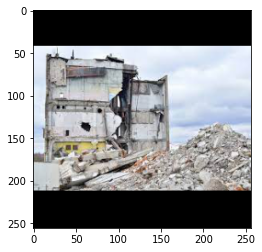

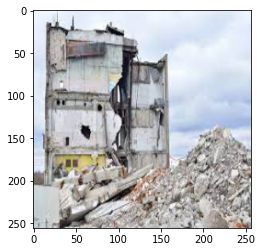

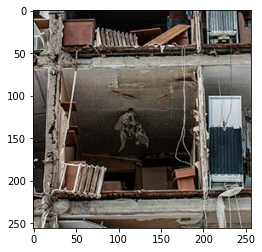

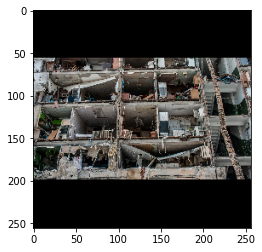

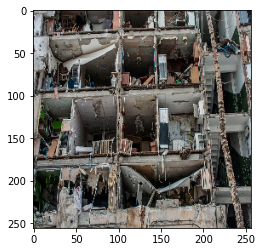

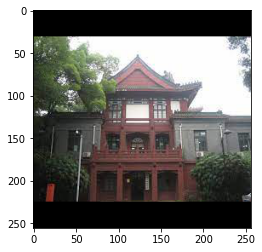

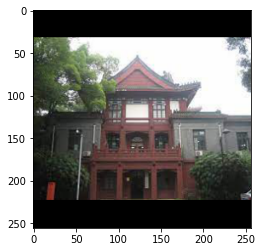

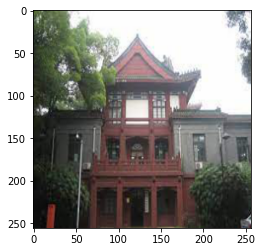

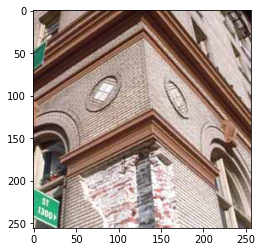

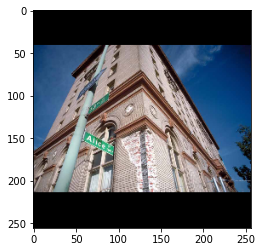

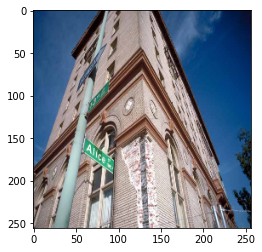

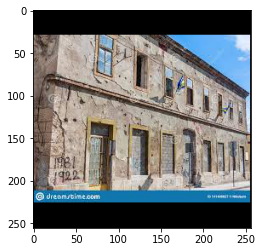

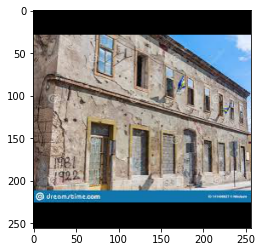

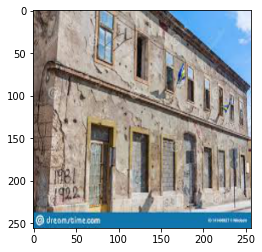

In [ ]:
test_images = []

for filename in os.scandir('/content/drive/MyDrive/CSC420/Prediction/test_images'):
  test_images.append(image.imread(filename.path))

for imgfile in range(len(test_images)):
  mp.imshow(test_images[imgfile].tolist())
  mp.show()

newimgarray = []

for imgfile in test_images:
  newimgarray.append(tf.image.resize_with_crop_or_pad(
    imgfile, 
    256, 
    256
))
  newimgarray.append(tf.image.resize_with_pad(
    imgfile,
    256,
    256,
    antialias=False
  ))
  newimgarray.append(tf.image.resize( #bilinear interpolation used to "resample" or scale the images
    imgfile,
    [256, 256],
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
  ))

# print(newimgarray.shape())

for imgfile in newimgarray:
  mp.imshow(np.array(imgfile, dtype=int))
  mp.show()

In [ ]:
import numpy
# converting list to array
imgarray = numpy.array(newimgarray)


In [ ]:
#imgarray = imgarray/255

print(len(newimgarray[0]))
print(len(newimgarray[0][0]))

256
256


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(imgarray)

1/1 [==============================] - 0s 319ms/step


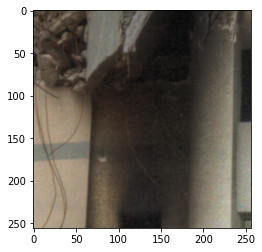

Non-damaged: 95%; Damaged: 5%


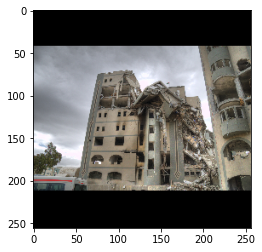

Non-damaged: 0%; Damaged: 100%


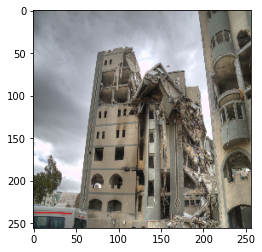

Non-damaged: 0%; Damaged: 100%


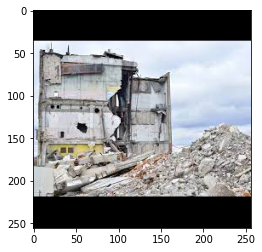

Non-damaged: 1%; Damaged: 99%


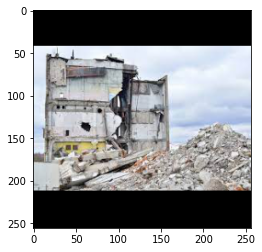

Non-damaged: 0%; Damaged: 100%


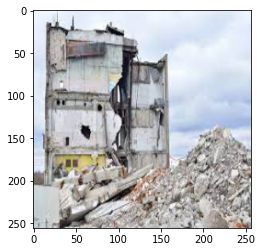

Non-damaged: 0%; Damaged: 100%


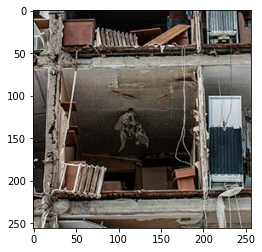

Non-damaged: 100%; Damaged: 0%


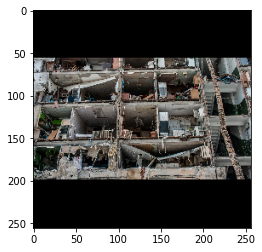

Non-damaged: 0%; Damaged: 100%


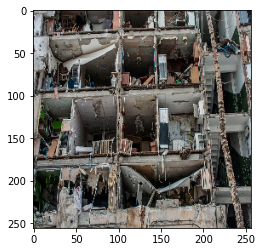

Non-damaged: 90%; Damaged: 10%


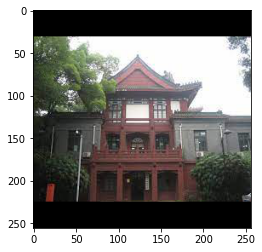

Non-damaged: 29%; Damaged: 71%


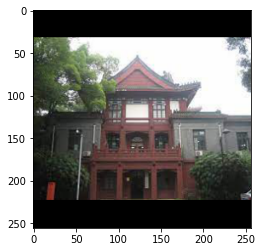

Non-damaged: 9%; Damaged: 91%


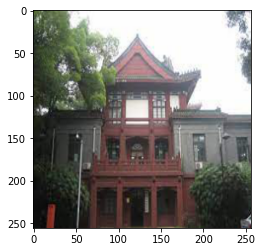

Non-damaged: 59%; Damaged: 41%


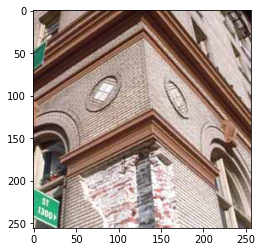

Non-damaged: 100%; Damaged: 0%


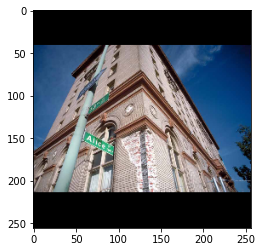

Non-damaged: 0%; Damaged: 100%


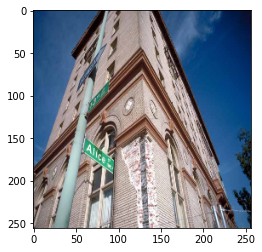

Non-damaged: 0%; Damaged: 100%


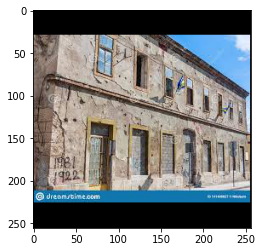

Non-damaged: 0%; Damaged: 100%


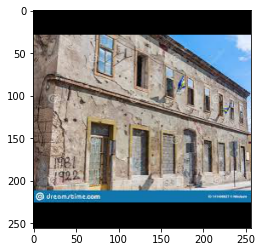

Non-damaged: 0%; Damaged: 100%


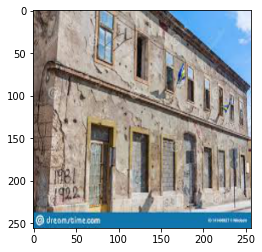

Non-damaged: 0%; Damaged: 100%


In [ ]:
for prediction in range(len(predictions)):
  mp.imshow(np.array(newimgarray[prediction], dtype=int))
  mp.show()
  print("Non-damaged: " + str(round(predictions[prediction][0] * 100)) + "%; Damaged: " + str(round(predictions[prediction][1] * 100)) + "%")

In [ ]:
  # newimgarray = []
  imgfile = image.imread('/content/drive/MyDrive/CSC410/CMFD/00000/00000_Mask.jpg')
  newimgarray.append(tf.image.resize( #bilinear interpolation used to "resample" or scale the images
    imgfile,
    [256, 256],
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
  ))

In [ ]:
imgfile = image.imread('/content/drive/MyDrive/CSC410/IMFD/07000/07000_Mask_Mouth_Chin.jpg')
newimgarray.append(tf.image.resize( #bilinear interpolation used to "resample" or scale the images
    imgfile,
    [256, 256],
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
  ))

In [ ]:
imgfile = image.imread('/content/drive/MyDrive/CSC410/CMFD/07000/07000_Mask.jpg')
newimgarray.append(tf.image.resize( #bilinear interpolation used to "resample" or scale the images
    imgfile,
    [256, 256],
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
  ))

In [ ]:
imgarray = numpy.array(newimgarray)


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(imgarray)

1/1 [==============================] - 1s 863ms/step


<Figure size 432x288 with 0 Axes>

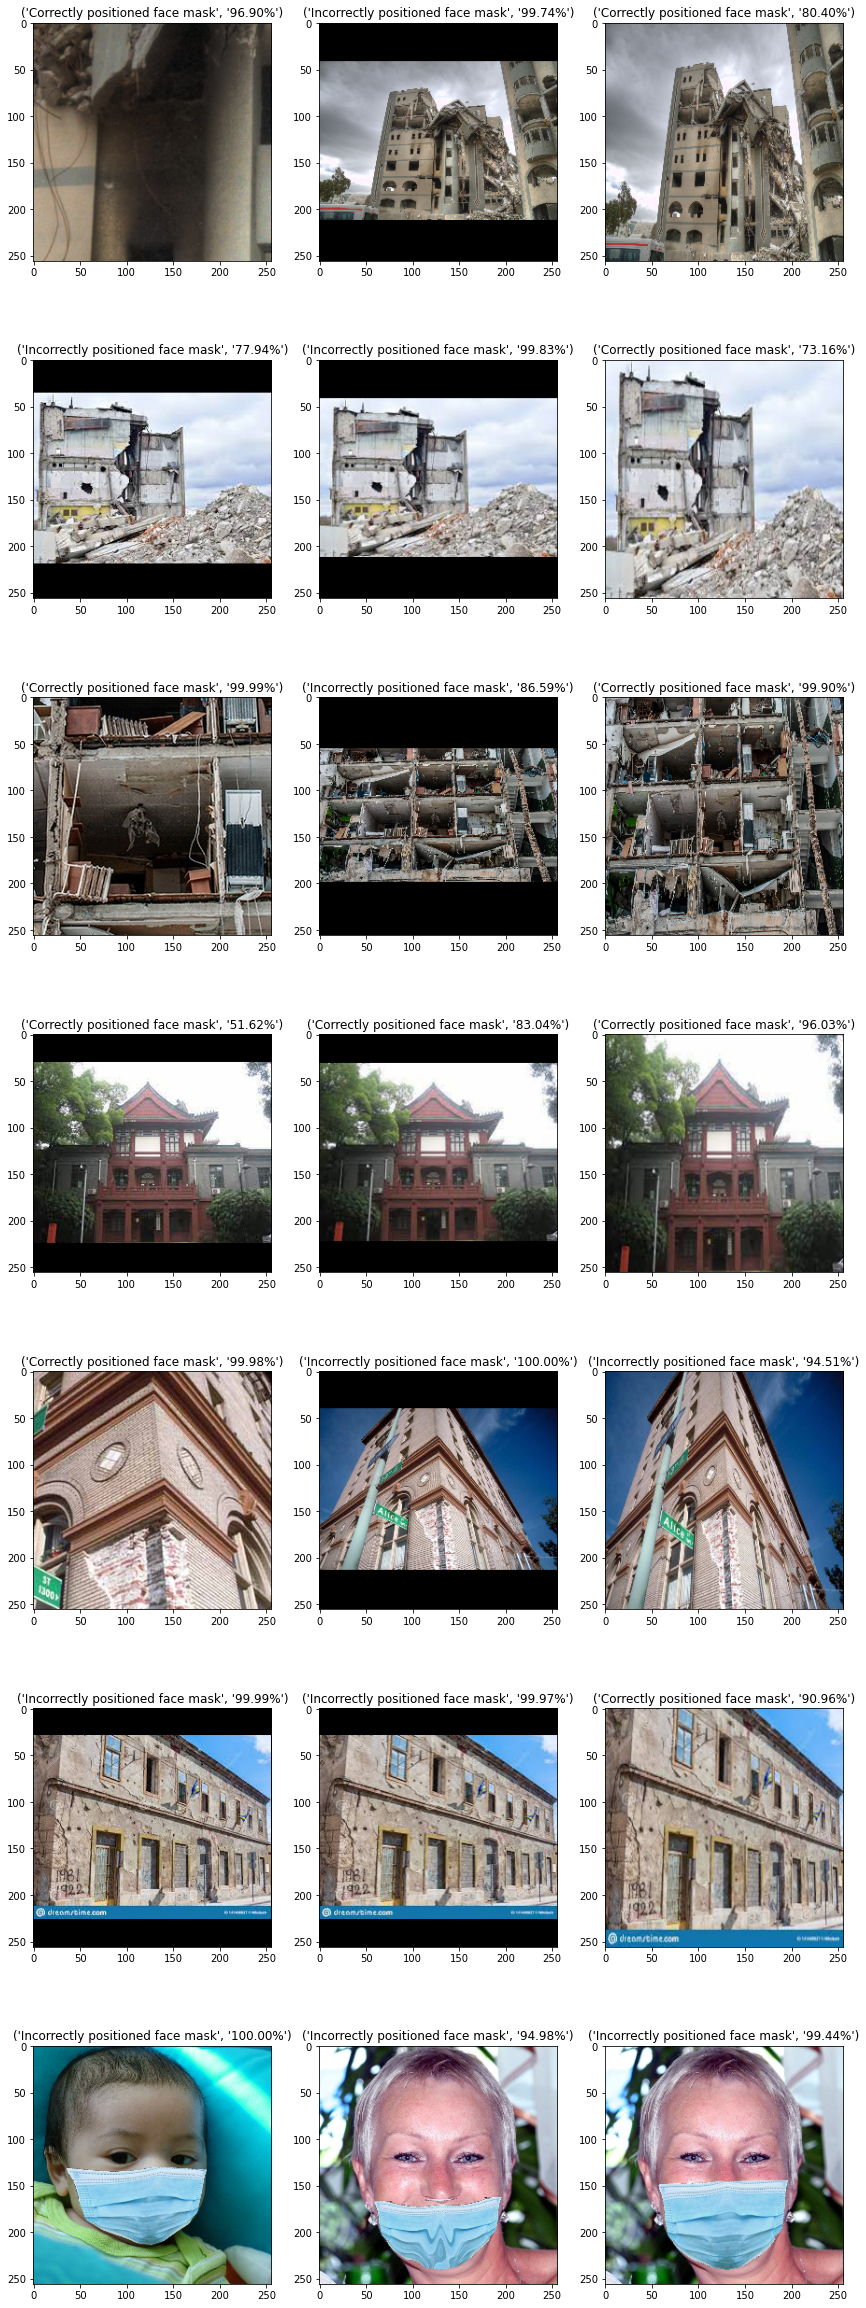

In [ ]:
mp.figure()
# print(len(predictions))
z,h = mp.subplots(int(len(predictions)/3), 3)
def predict(value):
  if value[0] > value[1]:
    return"Correctly positioned face mask",  "{0:.2%}".format(value[0])
  else:
    return"Incorrectly positioned face mask", "{0:.2%}".format(value[1])
for prediction in range(int(len(predictions)/3)):

  h[int(prediction), 0].imshow(np.array(newimgarray[int(prediction*3)], dtype=int))
  # mp.show()
  h[int(prediction), 0].set_title(predict(predictions[int(prediction*3)]))

  h[int(prediction), 1].imshow(np.array(newimgarray[int(prediction*3+1)], dtype=int))
  # mp.show()
  h[int(prediction), 1].set_title(predict(predictions[int(prediction*3+1)]))
  h[int(prediction), 2].imshow(np.array(newimgarray[int(prediction*3+2)], dtype=int))
  # mp.show()
  h[int(prediction), 2].set_title(predict(predictions[int(prediction*3+2)]))

mp.subplots_adjust(bottom=2, right=2, top=10)
mp.savefig("/content/drive/MyDrive/CSC410/graphed_data.png")